<a href="https://colab.research.google.com/github/SepehrSepehri/DataForGoodWR/blob/main/DataForGood_v_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting and Analyzing Twitter Data

In [ ]:
import tweepy as tw
#consumer_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
#access_token= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'







auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1. Data exploration

*   Read in the tweets data using pandas
*   Explore the data


Some ideas of things to look for:



*   the dimensions of the data
*   get DataFrame info
*   get summary statistics
*   get the value counts of categoric columns
*   count missing values


In [ ]:
user = "@WaterlooLibrary"
#search_words = '@worldvision'
tweets = tw.Cursor(api.user_timeline,
                   screen_name=user,
                   lang="en",
                   since="2010-01-20",
                   until='2021-02-28').items(10000)

def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']

# Sepehr: I defined this function to extract hashtags:
def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']




users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]



#users_locs
# url_tweet(tweet.entities['urls'])
# tweet.entities['urls']
# tweet['entities']['hashtags']]

In [ ]:
search_words = "@WaterlooLibrary"
#search_words = '@worldvision'
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since="2010-01-20",until='2021-02-28').items(10000)

def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']

# Sepehr: I defined this function to extract hashtags:
def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']




users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]



#users_locs
# url_tweet(tweet.entities['urls'])
# tweet.entities['urls']
# tweet['entities']['hashtags']]

In [ ]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['ID','created_at', 'screen_name','text', 'location',
                             'favorite_count', 'retweet_count','followers_count','friends_count',
                             'URL','hashtags'])
# Sepehr: I added entities to the list. We need hashtags from entities
df = tweet_text

#print the first few rows of data
df['text'][0]

"What's the key for finishing that novel of yours? Try working at the library. Author Chris Whitaker wanted to write… https://t.co/GDMAeObzpu"

In [ ]:
len(df)

3248

In [ ]:
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,What's the key for finishing that novel of you...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,@WymanMark @570NEWS @KitchLibrary Like @KitchL...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,Anne Lamott on Writing a Book for Those Feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,"Canada Reads 2021 takes place next week, March...","Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,❤️ We were overwhelmed by the 160+ Love Notes ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None


In [ ]:
df.iloc[:,3][4]

'❤️ We were overwhelmed by the 160+ Love Notes we received  throughout the month of Feb. We cannot thank you enough… https://t.co/SPCyebayYz'

In [ ]:
df.iloc[:,9][4]

'https://twitter.com/i/web/status/1367825472458010631'

In [ ]:
# Your code: number of rows and columns
df.shape

(3248, 11)

In [ ]:
# print types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               3248 non-null   int64         
 1   created_at       3248 non-null   datetime64[ns]
 2   screen_name      3248 non-null   object        
 3   text             3248 non-null   object        
 4   location         3248 non-null   object        
 5   favorite_count   3248 non-null   int64         
 6   retweet_count    3248 non-null   int64         
 7   followers_count  3248 non-null   int64         
 8   friends_count    3248 non-null   int64         
 9   URL              2907 non-null   object        
 10  hashtags         368 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 279.2+ KB


In [ ]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags
count,3248.0,3248,3248,3248,3248,3248.000000,3248.000000,3248.000000,3248.000000,2907,368
unique,NaN,3246,1,3247,1,NaN,NaN,NaN,NaN,2894,245
top,NaN,2020-11-20 16:00:02,WaterlooLibrary,RT @Laurier: Laurier EdTalks: Innovation in Ed...,"Waterloo, Ontario, Canada",NaN,NaN,NaN,NaN,http://NYTimes.com,bookadventcalendar
freq,NaN,2,3248,2,3248,NaN,NaN,NaN,NaN,6,23
first,NaN,2019-12-01 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-03-06 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31035514.0,NaN,NaN,NaN,NaN,2.961823,60.923953,8036.012315,7168.987685,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,5.563511,2189.228060,0.110306,0.110306,NaN,NaN
min,31035514.0,NaN,NaN,NaN,NaN,0.000000,0.000000,8036.000000,7168.000000,NaN,NaN
25%,31035514.0,NaN,NaN,NaN,NaN,0.000000,0.000000,8036.000000,7169.000000,NaN,NaN


In [ ]:
df['location'].value_counts()

Waterloo, Ontario, Canada    3248
Name: location, dtype: int64

In [ ]:
df.isnull().sum()

ID                    0
created_at            0
screen_name           0
text                  0
location              0
favorite_count        0
retweet_count         0
followers_count       0
friends_count         0
URL                 341
hashtags           2880
dtype: int64

# Dealing with text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html

*   Create a new column called num_chars that is the number of characters in each tweet
*   Create a new column called num_words that is a count of how many words in each tweet
*   Create a new column called num_ats that is a count of how many @ symbols in each

*   Noise cleaning: Eliminating meaningless and repetitive words, which are not helping in concluding the result such as RT-@-#-URLs-#-usernames, etc.
*   Stop-Words Removal: The next important step is removing the stop words. These words are usually meaningless and carry no or little importance in a sentence. Removing these words makes the sentence simpler. Examples of such words include the, a, an, as, he, she, etc. Stop words are more likely to occur repeatedly into the review of users
*   Stemming: Alternate word suffixes and decrease the words’ length to their root forms such as changing "clean", "cleaner", "cleaning", and "cleaned" to the base form of "clean".

















In [ ]:
# Sepehr: Remove retweet indicator such as  RT @WaterlooLibrary:
import re
#Extract retweet from the text and save it in 'retween' column:
df['retweet']=df['text'].str.findall(r'RT (@\w+):')

# remove retweet from the text:
def remove_RT(txt):
    return re.sub(r'RT @\w+:',r'', txt) 
df['text']=  [remove_RT(tweet) for tweet in  df['text']]
df['text']

0       What's the key for finishing that novel of you...
1       @WymanMark @570NEWS @KitchLibrary Like @KitchL...
2       Anne Lamott on Writing a Book for Those Feelin...
3       Canada Reads 2021 takes place next week, March...
4       ❤️ We were overwhelmed by the 160+ Love Notes ...
                              ...                        
3243    How To Wrap A Book: 8 Unique Options via @Book...
3244    We were snap'd! Thanks @snapdKW for coming to ...
3245    The @WR_Record Books for Kids Book Drive is wr...
3246    If you're a reader who loves to write, or a wr...
3247    Escape the Library! Collect clues, solve puzzl...
Name: text, Length: 3248, dtype: object

In [ ]:
df[df['retweet'].notnull()]

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,What's the key for finishing that novel of you...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None,[]
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,@WymanMark @570NEWS @KitchLibrary Like @KitchL...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[]
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,Anne Lamott on Writing a Book for Those Feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[]
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,"Canada Reads 2021 takes place next week, March...","Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[]
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,❤️ We were overwhelmed by the 160+ Love Notes ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3243,31035514,2019-12-02 19:05:30,WaterlooLibrary,How To Wrap A Book: 8 Unique Options via @Book...,"Waterloo, Ontario, Canada",4,2,8036,7169,https://bookriot.com/2019/10/22/how-to-wrap-a-...,gifts,[]
3244,31035514,2019-12-02 17:52:00,WaterlooLibrary,We were snap'd! Thanks @snapdKW for coming to ...,"Waterloo, Ontario, Canada",6,0,8036,7169,https://twitter.com/i/web/status/1201559654649...,None,[]
3245,31035514,2019-12-02 14:05:00,WaterlooLibrary,The @WR_Record Books for Kids Book Drive is wr...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1201502528745...,None,[]
3246,31035514,2019-12-02 13:20:00,WaterlooLibrary,"If you're a reader who loves to write, or a wr...","Waterloo, Ontario, Canada",5,0,8036,7169,https://twitter.com/i/web/status/1201491203633...,None,[]


In [ ]:
# number of characters
df['num_chars'] = df['text'].str.len()
# number of words
df['num_words'] = df['text'].str.count(' ') + 1
# number of "@" symbols
df['num_ats'] = df['text'].str.count('@')

In [ ]:
df['tokens'] = [m.lower() for m in df['text']]
df.head()



,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,What's the key for finishing that novel of you...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None,[],140,21,0,what's the key for finishing that novel of you...
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,@WymanMark @570NEWS @KitchLibrary Like @KitchL...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,Anne Lamott on Writing a Book for Those Feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,"Canada Reads 2021 takes place next week, March...","Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march..."
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,❤️ We were overwhelmed by the 160+ Love Notes ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...


In [ ]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df2 = df
df['text'].iloc[1]

'@WymanMark @570NEWS @KitchLibrary Like @KitchLibrary these 6 Dr. Seuss titles are currently unavailable at WPL as t… https://t.co/xN386AbxcC'

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df2.iloc[:,3]]
all_tweets_no_urls[:5]

['Whats the key for finishing that novel of yours Try working at the library Author Chris Whitaker wanted to write',
 'WymanMark 570NEWS KitchLibrary Like KitchLibrary these 6 Dr Seuss titles are currently unavailable at WPL as t',
 'Anne Lamott on Writing a Book for Those Feeling Hopeless lithubasked the best selling author five questions inc',
 'Canada Reads 2021 takes place next week March 811 cbcradio wants to help you get ready with their preshow podc',
 'We were overwhelmed by the 160 Love Notes we received throughout the month of Feb We cannot thank you enough']

In [ ]:
 stop_words = set(stopwords.words('english'))
# View a few words from the set
list(stop_words)[0:10]

['too',
 "should've",
 "hadn't",
 'here',
 'once',
 're',
 'yourselves',
 'yours',
 'don',
 'm']

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
#words_in_tweet[:2]
#words_in_tweet[1]

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

#tweets_nsw[0]
tweets_nsw_join = [' '.join(tweet) for tweet in tweets_nsw]
tweets_nsw_join[:5]

['whats key finishing novel try working library author chris whitaker wanted write',
 'wymanmark 570news kitchlibrary like kitchlibrary 6 dr seuss titles currently unavailable wpl',
 'anne lamott writing book feeling hopeless lithubasked best selling author five questions inc',
 'canada reads 2021 takes place next week march 811 cbcradio wants help get ready preshow podc',
 'overwhelmed 160 love notes received throughout month feb cannot thank enough']

In [ ]:
# stem
tokens = ['we', 'all', 'liked', 'the', 'movie']
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
[ps.stem(x) for x in tokens]


['we', 'all', 'like', 'the', 'movi']

In [ ]:
stemmer = PorterStemmer()
tweets_clean = [[stemmer.stem(x) for x in m] for m in tweets_nsw]
tweets_clean_join = [' '.join(tweet) for tweet in tweets_clean]
tweets_clean_join[:5]

['what key finish novel tri work librari author chri whitak want write',
 'wymanmark 570new kitchlibrari like kitchlibrari 6 dr seuss titl current unavail wpl',
 'ann lamott write book feel hopeless lithubask best sell author five question inc',
 'canada read 2021 take place next week march 811 cbcradio want help get readi preshow podc',
 'overwhelm 160 love note receiv throughout month feb cannot thank enough']

# Sepehr: 
I added lematization wwith POS_taggin to the notebook.

In [ ]:
# Sepehr: Cleaning data:
import re

df['text']=df['text'].str.strip()
df['text']=df['text'].str.lower()

# Removing urls:
def remove_url(text):
    pattern='http[s]{0,1}://.*'
    return re.sub(pattern,'',text)

df['text']=df['text'].apply(remove_url)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, "", text)
df['text']=df['text'].apply(lambda x : remove_html(x))


In [ ]:
# Sepehr:
# The following function revomes the emojis from text. 'apply' function should be used for each text.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [ ]:
# Sepehr
import string
string.punctuation
def remove_punc(text):
    return text.translate(text.maketrans('','',string.punctuation))
df['text']=df['text'].apply(lambda x: remove_punc(x))
df['text']

0       whats the key for finishing that novel of your...
1       wymanmark 570news kitchlibrary like kitchlibra...
2       anne lamott on writing a book for those feelin...
3       canada reads 2021 takes place next week march ...
4        we were overwhelmed by the 160 love notes we ...
                              ...                        
3243    how to wrap a book 8 unique options via bookriot 
3244    we were snapd thanks snapdkw for coming to wat...
3245    the wrrecord books for kids book drive is wrap...
3246    if youre a reader who loves to write or a writ...
3247    escape the library collect clues solve puzzles...
Name: text, Length: 3248, dtype: object

In [ ]:
# Sepehr: Tekenization:
from nltk import word_tokenize
from nltk.corpus import stopwords

df['tokenized']=df['text'].apply(word_tokenize)
stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])

df.head()


,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,whats the key for finishing that novel of your...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None,[],140,21,0,what's the key for finishing that novel of you...,"[whats, key, finishing, novel, try, working, l..."
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,wymanmark 570news kitchlibrary like kitchlibra...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...,"[wymanmark, 570news, kitchlibrary, like, kitch..."
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,anne lamott on writing a book for those feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...,"[anne, lamott, writing, book, feeling, hopeles..."
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,canada reads 2021 takes place next week march ...,"Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march...","[canada, reads, 2021, takes, place, next, week..."
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,we were overwhelmed by the 160 love notes we ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...,"[overwhelmed, 160, love, notes, received, thro..."


### Part of Speach (POS) tagging

In [ ]:
# Sepehr
# Sepehr: downloading wordet
nltk.download('wordnet')
# downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')
# importing wordnet from nltk.corpus
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Sepehr
def defualt_pos_tagger (text):
    
    #tags=[nltk.pos_tag(word) for word in text]
    tags=nltk.pos_tag(text)
    return tags

df['defualt_postag']=df['tokenized'].apply(defualt_pos_tagger)

In [ ]:
# Sepehr
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['defualt_postag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,whats the key for finishing that novel of your...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None,[],140,21,0,what's the key for finishing that novel of you...,"[whats, key, finishing, novel, try, working, l...","[(whats, NNS), (key, JJ), (finishing, VBG), (n...","[(whats, n), (key, a), (finishing, v), (novel,..."
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,wymanmark 570news kitchlibrary like kitchlibra...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...,"[wymanmark, 570news, kitchlibrary, like, kitch...","[(wymanmark, NN), (570news, CD), (kitchlibrary...","[(wymanmark, n), (570news, n), (kitchlibrary, ..."
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,anne lamott on writing a book for those feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...,"[anne, lamott, writing, book, feeling, hopeles...","[(anne, JJ), (lamott, NN), (writing, VBG), (bo...","[(anne, a), (lamott, n), (writing, v), (book, ..."
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,canada reads 2021 takes place next week march ...,"Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march...","[canada, reads, 2021, takes, place, next, week...","[(canada, NN), (reads, VBZ), (2021, CD), (take...","[(canada, n), (reads, v), (2021, n), (takes, v..."
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,we were overwhelmed by the 160 love notes we ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...,"[overwhelmed, 160, love, notes, received, thro...","[(overwhelmed, JJ), (160, CD), (love, NN), (no...","[(overwhelmed, a), (160, n), (love, n), (notes..."


In [ ]:
# Sepehr: lemmatization:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemmatized_words']=df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

df['lemmatized_text']=[' '.join(map(str,i)) for i in df['lemmatized_words']]
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,whats the key for finishing that novel of your...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None,[],140,21,0,what's the key for finishing that novel of you...,"[whats, key, finishing, novel, try, working, l...","[(whats, NNS), (key, JJ), (finishing, VBG), (n...","[(whats, n), (key, a), (finishing, v), (novel,...","[whats, key, finish, novel, try, work, library...",whats key finish novel try work library author...
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,wymanmark 570news kitchlibrary like kitchlibra...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...,"[wymanmark, 570news, kitchlibrary, like, kitch...","[(wymanmark, NN), (570news, CD), (kitchlibrary...","[(wymanmark, n), (570news, n), (kitchlibrary, ...","[wymanmark, 570news, kitchlibrary, like, kitch...",wymanmark 570news kitchlibrary like kitchlibra...
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,anne lamott on writing a book for those feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...,"[anne, lamott, writing, book, feeling, hopeles...","[(anne, JJ), (lamott, NN), (writing, VBG), (bo...","[(anne, a), (lamott, n), (writing, v), (book, ...","[anne, lamott, write, book, feeling, hopeless,...",anne lamott write book feeling hopeless lithub...
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,canada reads 2021 takes place next week march ...,"Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march...","[canada, reads, 2021, takes, place, next, week...","[(canada, NN), (reads, VBZ), (2021, CD), (take...","[(canada, n), (reads, v), (2021, n), (takes, v...","[canada, read, 2021, take, place, next, week, ...",canada read 2021 take place next week march 81...
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,we were overwhelmed by the 160 love notes we ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...,"[overwhelmed, 160, love, notes, received, thro...","[(overwhelmed, JJ), (160, CD), (love, NN), (no...","[(overwhelmed, a), (160, n), (love, n), (notes...","[overwhelmed, 160, love, note, receive, throug...",overwhelmed 160 love note receive throughout m...


In [ ]:
# Sepehr
print(df['text'].iloc[996])
print(df['lemmatized_text'].iloc[996])

have you ever wished that you could see into the future in vanessa yus magical paris tea shop by rosellewriter t… 
ever wish could see future vanessa yus magical paris tea shop rosellewriter t…


# EDA

## Frequency of words

In [ ]:
words = df['lemmatized_words']
allwords = []
for wordlist in words:
    allwords += wordlist

In [ ]:
from nltk import FreqDist
number_words=50
mostcommon = FreqDist(allwords).most_common(number_words)
print(mostcommon)


[('book', 542), ('wpl', 482), ('u', 298), ('library', 287), ('’', 273), ('join', 272), ('read', 233), ('new', 231), ('share', 201), ('live', 190), ('learn', 181), ('one', 179), ('author', 177), ('year', 168), ('online', 165), ('explore', 165), ('day', 161), ('virtual', 161), ('get', 157), ('make', 157), ('fun', 151), ('time', 149), ('go', 147), ('today', 146), ('family', 146), ('take', 141), ('program', 141), ('look', 140), ('great', 136), ('kid', 128), ('waterloo', 121), ('novel', 116), ('week', 116), ('writer', 116), ('story', 116), ('help', 114), ('world', 112), ('free', 111), ('love', 109), ('home', 109), ('via', 109), ('know', 104), ('15', 102), ('event', 100), ('blogger', 97), ('2020', 95), ('open', 90), ('community', 88), ('branch', 86), ('write', 85)]


In [ ]:
# Sepehr: removing apostrophe:
def remove_apostrophe(text):
    apostrophe = re.compile(r"’")
    return re.sub(apostrophe, "", text)
    
df['lemmatized_text']=df['lemmatized_text'].apply(lambda x: remove_apostrophe(x))
df['lemmatized_text']
df['lemmatized_words']= df['lemmatized_text'].str.split()
words = df['lemmatized_words']
allwords = []
for wordlist in words:
    allwords += wordlist

number_words=50
mostcommon = FreqDist(allwords).most_common(number_words)
print(mostcommon)


[('book', 542), ('wpl', 482), ('u', 298), ('library', 287), ('join', 272), ('read', 233), ('new', 231), ('share', 201), ('live', 190), ('learn', 181), ('one', 179), ('author', 177), ('year', 168), ('online', 165), ('explore', 165), ('day', 161), ('virtual', 161), ('get', 157), ('make', 157), ('fun', 151), ('time', 149), ('go', 147), ('today', 146), ('family', 146), ('take', 141), ('program', 141), ('look', 140), ('great', 136), ('kid', 128), ('waterloo', 121), ('novel', 116), ('week', 116), ('writer', 116), ('story', 116), ('help', 114), ('world', 112), ('free', 111), ('love', 109), ('home', 109), ('via', 109), ('know', 104), ('15', 102), ('event', 100), ('blogger', 97), ('2020', 95), ('open', 90), ('community', 88), ('branch', 86), ('write', 85), ('club', 84)]


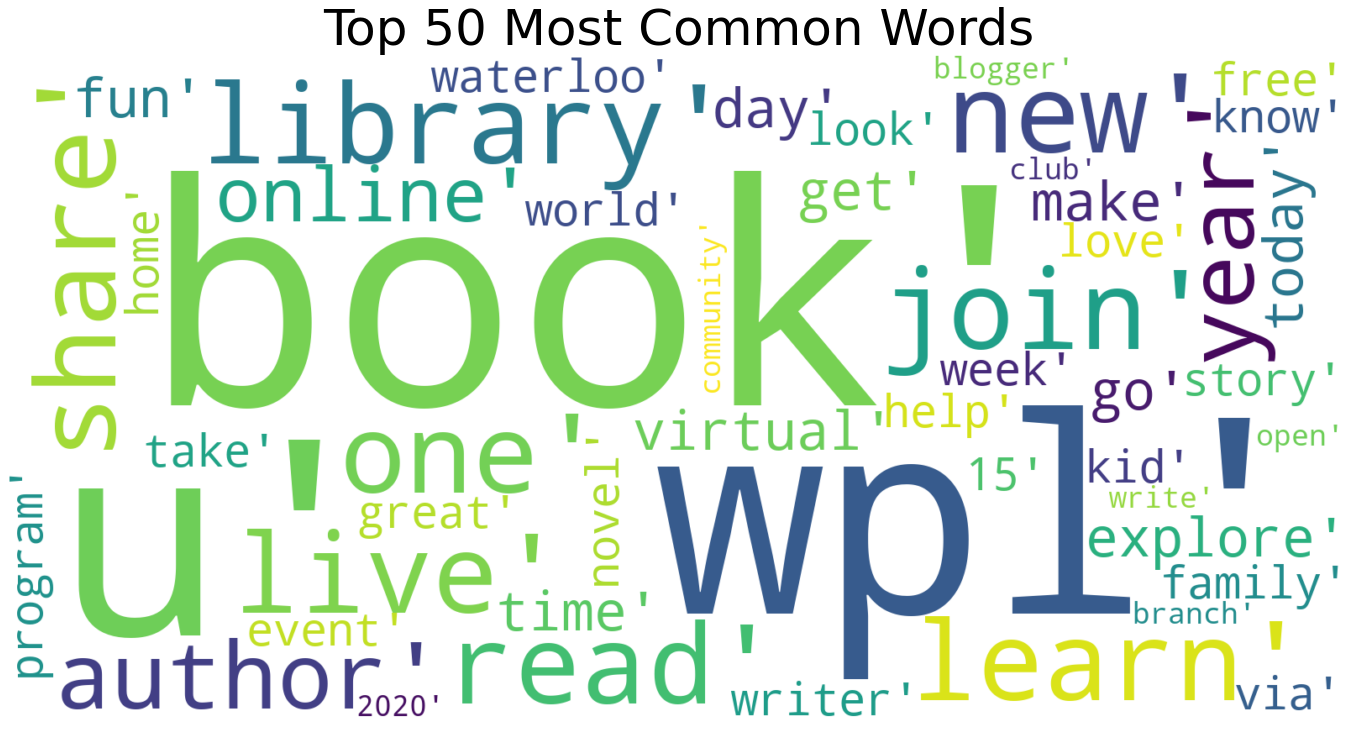

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {number_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Frequent hashtags 


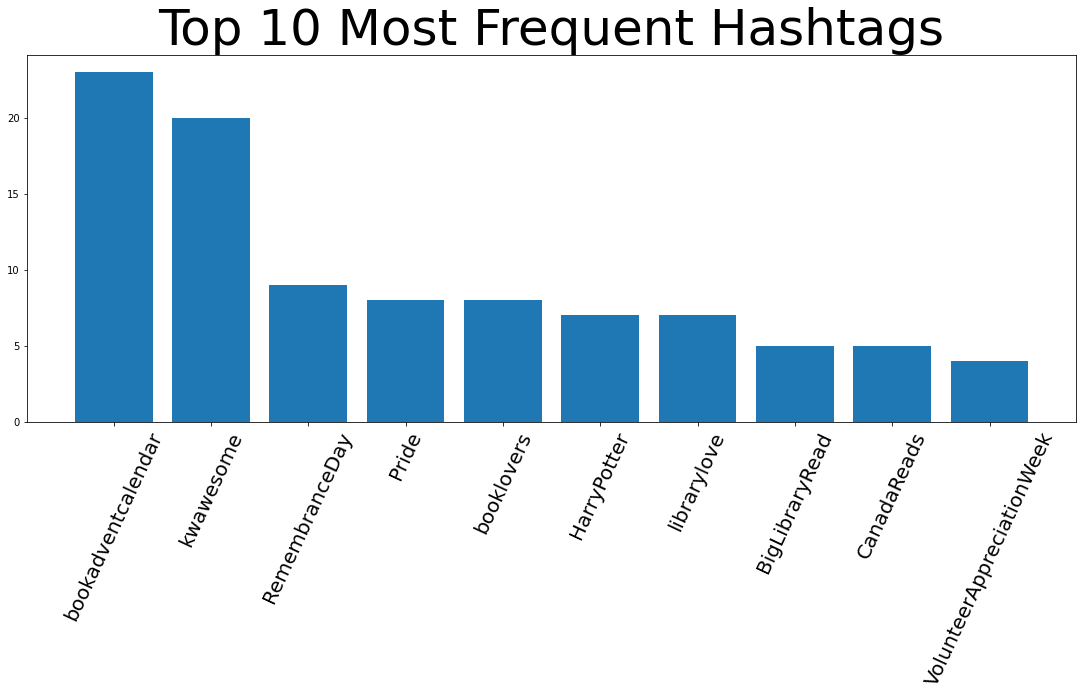

In [ ]:

number_hashtags=10
hashtags_freq=df['hashtags'].value_counts()[:number_hashtags]

fig = plt.figure(figsize=(15,6))

plt.title(f'Top {number_hashtags} Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)

plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation='65')
plt.show()


100 Most  Frequent Hashtag

### Hashtags for 200 most retweeted tweets

In [ ]:
hastags_most_retweeted=df.sort_values('retweet_count',ascending=False).iloc[:200]
hastags_most_retweeted.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text
181,31035514,2021-01-28 14:57:34,WaterlooLibrary,today every view of this video helps create po...,"Waterloo, Ontario, Canada",0,113953,8036,7169,None,None,[@Bell_LetsTalk],122,25,0,"today, every view of this video helps create ...","[today, every, view, video, helps, create, pos...","[(today, NN), (every, DT), (view, NN), (video,...","[(today, n), (every, n), (view, n), (video, n)...","[today, every, view, video, help, create, posi...",today every view video help create positive ch...
3171,31035514,2019-12-11 16:43:46,WaterlooLibrary,“well i am telling you there is hope i have se...,"Waterloo, Ontario, Canada",0,47177,8036,7169,None,None,[@GretaThunberg],122,23,0,“well i am telling you there is hope. i have ...,"[“, well, telling, hope, seen, come, governmen...","[(“, RB), (well, RB), (telling, VBG), (hope, N...","[(“, r), (well, r), (telling, v), (hope, n), (...","[“, well, tell, hope, see, come, government, c...",“ well tell hope see come government corporati...
1883,31035514,2020-06-12 13:23:18,WaterlooLibrary,on our street we accept all we love all and we...,"Waterloo, Ontario, Canada",0,17216,8036,7169,None,PrideMonth,[@sesamestreet],106,17,0,"on our street, we accept all, we love all, an...","[street, accept, love, respect, happy, pridemo...","[(street, NN), (accept, NNS), (love, VBP), (re...","[(street, n), (accept, n), (love, v), (respect...","[street, accept, love, respect, happy, pridemo...",street accept love respect happy pridemonth
2663,31035514,2020-02-24 16:43:13,WaterlooLibrary,with slide rules and pencils katherine johnson...,"Waterloo, Ontario, Canada",0,6320,8036,7169,None,None,[@NASA],131,21,0,"with slide rules and pencils, katherine johns...","[slide, rules, pencils, katherine, johnson, ’,...","[(slide, NN), (rules, NNS), (pencils, VBP), (k...","[(slide, n), (rules, n), (pencils, v), (kather...","[slide, rule, pencil, katherine, johnson, bril...",slide rule pencil katherine johnson brilliant...
2495,31035514,2020-03-25 20:03:16,WaterlooLibrary,thank you medical workers\nthank you first res...,"Waterloo, Ontario, Canada",0,5048,8036,7169,None,None,[@CTV],132,17,0,thank you medical workers\nthank you first re...,"[thank, medical, workers, thank, first, respon...","[(thank, VB), (medical, JJ), (workers, NNS), (...","[(thank, v), (medical, a), (workers, n), (than...","[thank, medical, worker, thank, first, respond...",thank medical worker thank first responder tha...


### Hashtags for 200 most liked tweets

Write a code to extract most frequent hashtags from 200 most liked tweets? 

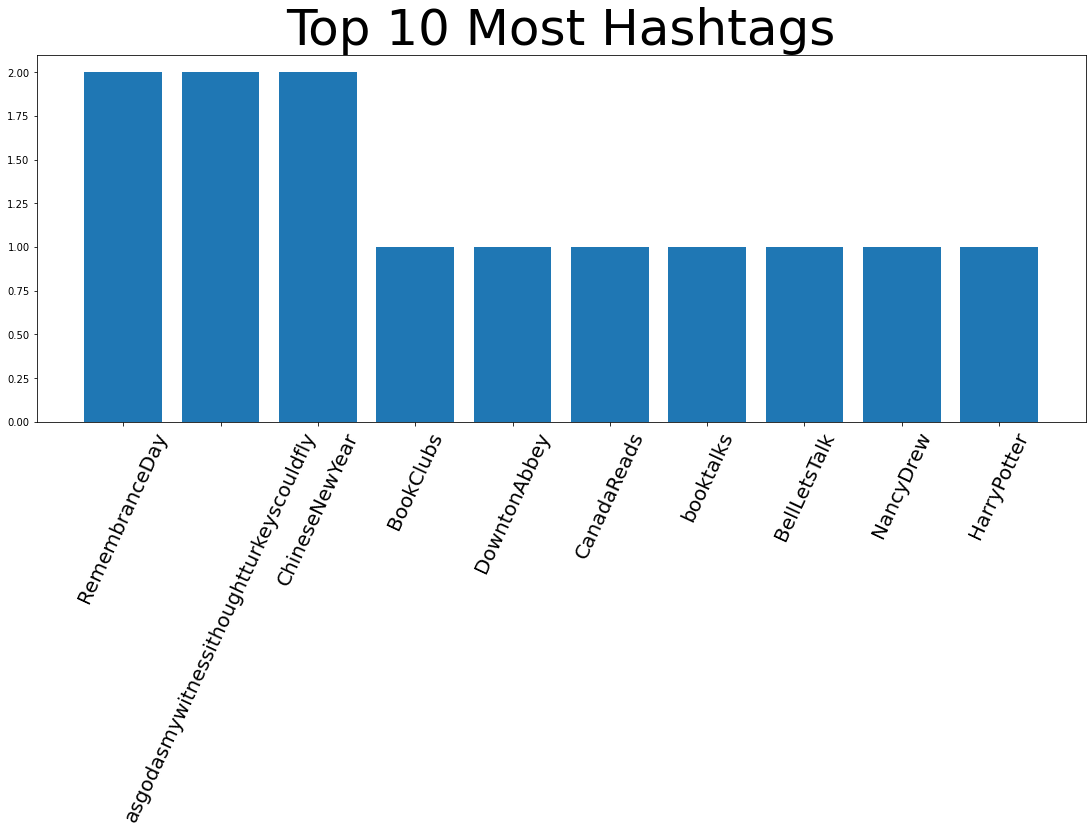

In [ ]:
# Solution:

hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


## Sentiment Analysis

**Sentiment analysis** is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string.


**TextBlob** is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as **part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation**, and more.

*   PatternAnalyzer - a default classifier that is built on the pattern library
*   NaiveBayesAnalyzer - an NLTK model trained on a movie reviews corpus




In [ ]:
from textblob import TextBlob
df['sentiment']= df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text,sentiment
0,31035514,2021-03-06 00:05:00,WaterlooLibrary,whats the key for finishing that novel of your...,"Waterloo, Ontario, Canada",1,1,8036,7169,https://twitter.com/i/web/status/1367989553840...,None,[],140,21,0,what's the key for finishing that novel of you...,"[whats, key, finishing, novel, try, working, l...","[(whats, NNS), (key, JJ), (finishing, VBG), (n...","[(whats, n), (key, a), (finishing, v), (novel,...","[whats, key, finish, novel, try, work, library...",whats key finish novel try work library author...,0.0
1,31035514,2021-03-05 19:01:02,WaterlooLibrary,wymanmark 570news kitchlibrary like kitchlibra...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...,"[wymanmark, 570news, kitchlibrary, like, kitch...","[(wymanmark, NN), (570news, CD), (kitchlibrary...","[(wymanmark, n), (570news, n), (kitchlibrary, ...","[wymanmark, 570news, kitchlibrary, like, kitch...",wymanmark 570news kitchlibrary like kitchlibra...,0.0
2,31035514,2021-03-05 19:00:01,WaterlooLibrary,anne lamott on writing a book for those feelin...,"Waterloo, Ontario, Canada",1,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...,"[anne, lamott, writing, book, feeling, hopeles...","[(anne, JJ), (lamott, NN), (writing, VBG), (bo...","[(anne, a), (lamott, n), (writing, v), (book, ...","[anne, lamott, write, book, feeling, hopeless,...",anne lamott write book feeling hopeless lithub...,1.0
3,31035514,2021-03-05 14:55:00,WaterlooLibrary,canada reads 2021 takes place next week march ...,"Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march...","[canada, reads, 2021, takes, place, next, week...","[(canada, NN), (reads, VBZ), (2021, CD), (take...","[(canada, n), (reads, v), (2021, n), (takes, v...","[canada, read, 2021, take, place, next, week, ...",canada read 2021 take place next week march 81...,0.1
4,31035514,2021-03-05 13:13:00,WaterlooLibrary,we were overwhelmed by the 160 love notes we ...,"Waterloo, Ontario, Canada",4,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...,"[overwhelmed, 160, love, notes, received, thro...","[(overwhelmed, JJ), (160, CD), (love, NN), (no...","[(overwhelmed, a), (160, n), (love, n), (notes...","[overwhelmed, 160, love, note, receive, throug...",overwhelmed 160 love note receive throughout m...,0.5


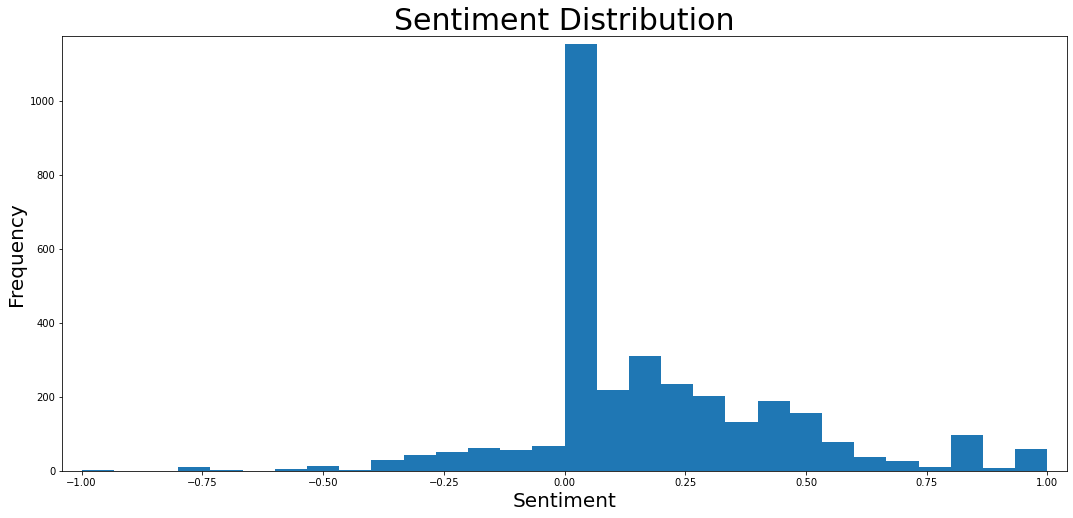

In [ ]:
plt.figure(figsize=(18,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df['sentiment'], bins=30)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

Lets have a look at poitive tweets:

In [ ]:
df[df['sentiment']>.8]['text'].head()

2      anne lamott on writing a book for those feelin...
44     another wonderful laurier edtalk thank you cat...
45     thank you shortfingerbeer for joining us for a...
69     we asked our staff what some of their favourit...
118    renisoncollege we are also incredibly excited ...
Name: text, dtype: object

And negative tweets

In [ ]:
df[df['sentiment']<-.7]['text'].head()

187    the humboldt crash was a horrible tragedy felt...
275    angiecthomas author of the hate u give talks a...
634    eloise liveaction movie based on children’s bo...
651    join mark and martina of hospicewaterloo nov 1...
695    join mark and martina of hospicewaterloo nov 1...
Name: text, dtype: object

### Most Frequent words with positive sentiment

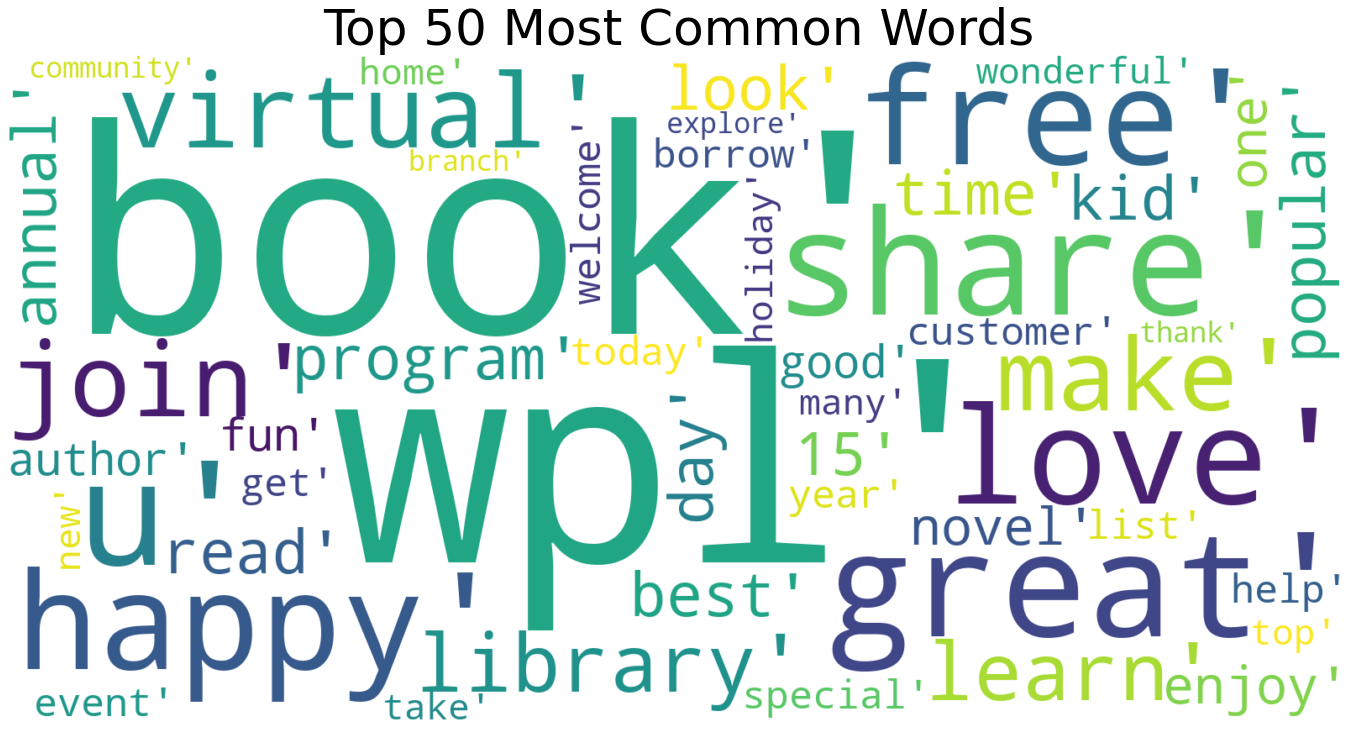

In [ ]:
words = df[df['sentiment']>0.33]['lemmatized_words']
allwords = []
for wordlist in words:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Fequent words with negative sentiment

60


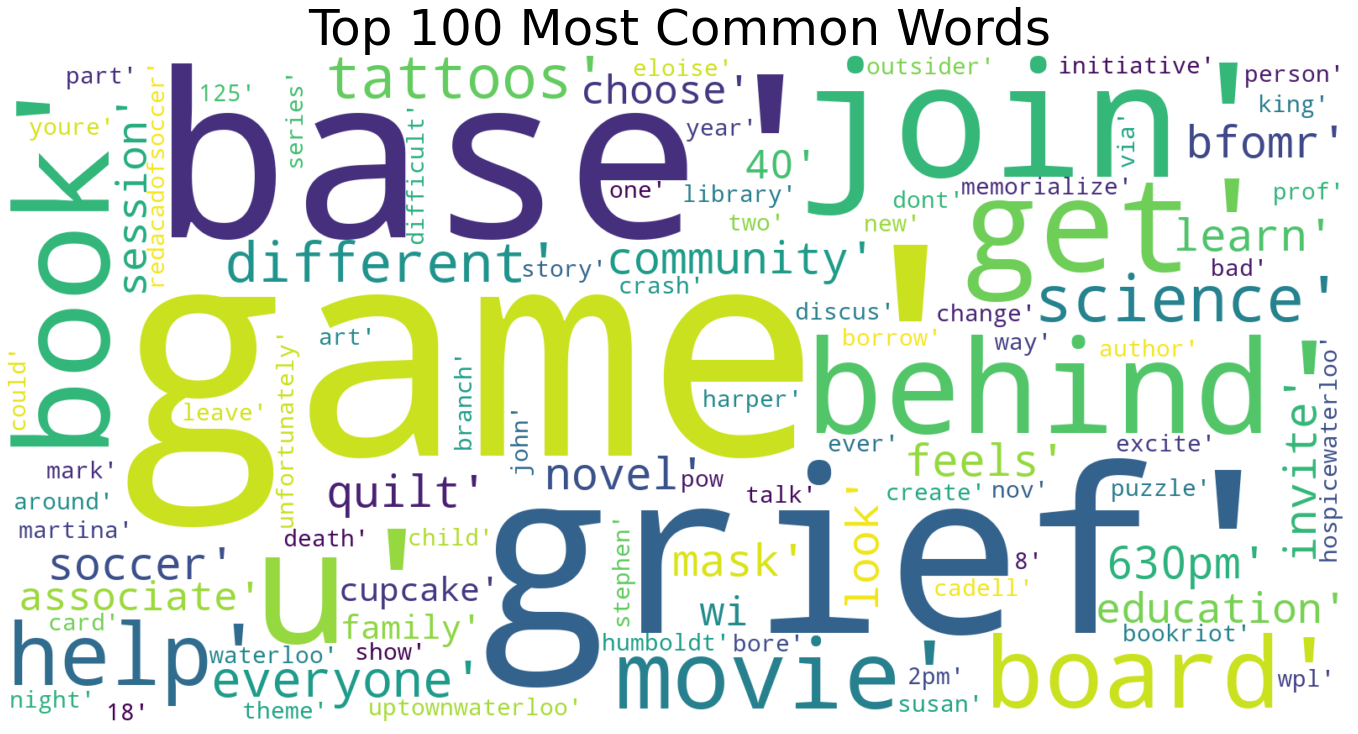

In [ ]:
words = df[df['sentiment']<-0.33]['lemmatized_words']
print(len(words))
allwords = []
for wordlist in words:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Rammez suggetion about positive and negative words.

In [ ]:
df

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text,sentiment
0,31035514,2021-03-05 19:01:02,WaterlooLibrary,wymanmark 570news kitchlibrary like kitchlibra...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...,"[wymanmark, 570news, kitchlibrary, like, kitch...","[(wymanmark, NN), (570news, CD), (kitchlibrary...","[(wymanmark, n), (570news, n), (kitchlibrary, ...","[wymanmark, 570news, kitchlibrary, like, kitch...",wymanmark 570news kitchlibrary like kitchlibra...,0.000000
1,31035514,2021-03-05 19:00:01,WaterlooLibrary,anne lamott on writing a book for those feelin...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...,"[anne, lamott, writing, book, feeling, hopeles...","[(anne, JJ), (lamott, NN), (writing, VBG), (bo...","[(anne, a), (lamott, n), (writing, v), (book, ...","[anne, lamott, write, book, feeling, hopeless,...",anne lamott write book feeling hopeless lithub...,1.000000
2,31035514,2021-03-05 14:55:00,WaterlooLibrary,canada reads 2021 takes place next week march ...,"Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march...","[canada, reads, 2021, takes, place, next, week...","[(canada, NN), (reads, VBZ), (2021, CD), (take...","[(canada, n), (reads, v), (2021, n), (takes, v...","[canada, read, 2021, take, place, next, week, ...",canada read 2021 take place next week march 81...,0.100000
3,31035514,2021-03-05 13:13:00,WaterlooLibrary,we were overwhelmed by the 160 love notes we ...,"Waterloo, Ontario, Canada",3,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...,"[overwhelmed, 160, love, notes, received, thro...","[(overwhelmed, JJ), (160, CD), (love, NN), (no...","[(overwhelmed, a), (160, n), (love, n), (notes...","[overwhelmed, 160, love, note, receive, throug...",overwhelmed 160 love note receive throughout m...,0.500000
4,31035514,2021-03-05 00:00:01,WaterlooLibrary,the movies from the twilight saga by stephenie...,"Waterloo, Ontario, Canada",2,0,8036,7169,https://twitter.com/i/web/status/1367625911751...,None,[],139,21,0,the movies from the twilight saga by stephenie...,"[movies, twilight, saga, stephenie, meyer, inc...","[(movies, NNS), (twilight, VBD), (saga, JJ), (...","[(movies, n), (twilight, v), (saga, a), (steph...","[movie, twilight, saga, stephenie, meyer, incl...",movie twilight saga stephenie meyer include re...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31035514,2020-10-04 17:04:00,WaterlooLibrary,have you ever wished that you could see into t...,"Waterloo, Ontario, Canada",1,2,8036,7169,https://twitter.com/i/web/status/1312800650028...,None,[],140,22,1,have you ever wished that you could see into t...,"[ever, wished, could, see, future, vanessa, yu...","[(ever, RB), (wished, VBN), (could, MD), (see,...","[(ever, r), (wished, v), (could, n), (see, v),...","[ever, wish, could, see, future, vanessa, yus,...",ever wish could see future vanessa yus magical...,0.250000
996,31035514,2020-10-04 16:15:00,WaterlooLibrary,after school snacks on oct 6th at 4pm kids in ...,"Waterloo, Ontario, Canada",0,1,8036,7169,https://twitter.com/i/web/status/1312788318501...,None,[],140,27,0,after school snacks. on oct 6th at 4pm kids in...,"[school, snacks, oct, 6th, 4pm, kids, grades, ...","[(school, NN), (snacks, NNS), (oct, VBP), (6th...","[(school, n), (snacks, n), (oct, v), (6th, n),...","[school, snack, oct, 6th, 4pm, kid, grade, 2, ...",school snack oct 6th 4pm kid grade 2 6 join u ...,0.136364
997,31

## Characteristics of most Liked tweets:

In [ ]:
hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

In [ ]:
print('The average of the number of words',hastags_most_liked['num_words'].mean())

print('The average of the number of chars',hastags_most_liked['num_chars'].mean())


The average of the number of words 20.215
The average of the number of chars 138.995


In [ ]:
hastags_least_liked=df.sort_values('favorite_count',ascending=True).iloc[:200]
print('The average of the number of words',hastags_least_liked['num_words'].mean())
print('The average of the number of chars',hastags_least_liked['num_chars'].mean())

The average of the number of words 20.17
The average of the number of chars 130.71


# Finding influencers in the network:

In [ ]:
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text,sentiment
0,31035514,2021-03-05 19:01:02,WaterlooLibrary,wymanmark 570news kitchlibrary like kitchlibra...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367913060569...,None,[],140,18,4,@wymanmark @570news @kitchlibrary like @kitchl...,"[wymanmark, 570news, kitchlibrary, like, kitch...","[(wymanmark, NN), (570news, CD), (kitchlibrary...","[(wymanmark, n), (570news, n), (kitchlibrary, ...","[wymanmark, 570news, kitchlibrary, like, kitch...",wymanmark 570news kitchlibrary like kitchlibra...,0.0
1,31035514,2021-03-05 19:00:01,WaterlooLibrary,anne lamott on writing a book for those feelin...,"Waterloo, Ontario, Canada",0,0,8036,7169,https://twitter.com/i/web/status/1367912803814...,None,[],140,19,1,anne lamott on writing a book for those feelin...,"[anne, lamott, writing, book, feeling, hopeles...","[(anne, JJ), (lamott, NN), (writing, VBG), (bo...","[(anne, a), (lamott, n), (writing, v), (book, ...","[anne, lamott, write, book, feeling, hopeless,...",anne lamott write book feeling hopeless lithub...,1.0
2,31035514,2021-03-05 14:55:00,WaterlooLibrary,canada reads 2021 takes place next week march ...,"Waterloo, Ontario, Canada",2,1,8036,7169,https://twitter.com/i/web/status/1367851141539...,None,[],140,21,1,"canada reads 2021 takes place next week, march...","[canada, reads, 2021, takes, place, next, week...","[(canada, NN), (reads, VBZ), (2021, CD), (take...","[(canada, n), (reads, v), (2021, n), (takes, v...","[canada, read, 2021, take, place, next, week, ...",canada read 2021 take place next week march 81...,0.1
3,31035514,2021-03-05 13:13:00,WaterlooLibrary,we were overwhelmed by the 160 love notes we ...,"Waterloo, Ontario, Canada",3,0,8036,7169,https://twitter.com/i/web/status/1367825472458...,None,[],139,23,0,❤️ we were overwhelmed by the 160+ love notes ...,"[overwhelmed, 160, love, notes, received, thro...","[(overwhelmed, JJ), (160, CD), (love, NN), (no...","[(overwhelmed, a), (160, n), (love, n), (notes...","[overwhelmed, 160, love, note, receive, throug...",overwhelmed 160 love note receive throughout m...,0.5
4,31035514,2021-03-05 00:00:01,WaterlooLibrary,the movies from the twilight saga by stephenie...,"Waterloo, Ontario, Canada",2,0,8036,7169,https://twitter.com/i/web/status/1367625911751...,None,[],139,21,0,the movies from the twilight saga by stephenie...,"[movies, twilight, saga, stephenie, meyer, inc...","[(movies, NNS), (twilight, VBD), (saga, JJ), (...","[(movies, n), (twilight, v), (saga, a), (steph...","[movie, twilight, saga, stephenie, meyer, incl...",movie twilight saga stephenie meyer include re...,0.0


In [ ]:
influencers=set()
for user in df['screen_name']:
  if df[df['screen_name']==user]['followers_count'].iloc[0]>500 and df[df['screen_name']==user]['friends_count'].iloc[0]<400 :
    influencers.add(user)
print(influencers)

{'MsKMarshall'}


# Group By

# number of hashtags in a tweet vs how many likes they get

In [ ]:
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text,sentiment
0,2282627935,2021-02-27 16:07:14,Letchworth25,puzzles have arrived at wpl \n\nweve added 70...,,0,5,177,533,None,None,[@WaterlooLibrary],120,22,0,🧩 puzzles have arrived at wpl! \n\nwe've adde...,"[puzzles, arrived, wpl, weve, added, 70, puzzl...","[(puzzles, NNS), (arrived, VBD), (wpl, JJ), (w...","[(puzzles, n), (arrived, v), (wpl, a), (weve, ...","[puzzle, arrive, wpl, weve, add, 70, puzzle, r...",puzzle arrive wpl weve add 70 puzzle range 351...,0.000000
1,3372945303,2021-02-27 15:16:11,shaqpeaz,puzzles have arrived at wpl \n\nweve added 70...,"Ontario, Canada",0,5,832,977,None,None,[@WaterlooLibrary],120,22,0,🧩 puzzles have arrived at wpl! \n\nwe've adde...,"[puzzles, arrived, wpl, weve, added, 70, puzzl...","[(puzzles, NNS), (arrived, VBD), (wpl, JJ), (w...","[(puzzles, n), (arrived, v), (wpl, a), (weve, ...","[puzzle, arrive, wpl, weve, add, 70, puzzle, r...",puzzle arrive wpl weve add 70 puzzle range 351...,0.000000
2,1277645709152567301,2021-02-27 14:53:26,shane_plante,looking for inspiration to support your childs...,,0,1,45,120,None,None,[@stacejl],128,16,5,looking for inspiration to support your child...,"[looking, inspiration, support, childs, learni...","[(looking, VBG), (inspiration, NN), (support, ...","[(looking, v), (inspiration, n), (support, n),...","[look, inspiration, support, child, learn, hom...",look inspiration support child learn home wrds...,0.000000
3,846078295,2021-02-27 04:01:38,ga_richardson,the forgotten home child was wpl blogger bakin...,Vancouver & Takla Landing,0,3,13855,14896,None,None,[@WaterlooLibrary],120,19,1,the forgotten home child was wpl blogger @bak...,"[forgotten, home, child, wpl, blogger, bakingb...","[(forgotten, VBN), (home, NN), (child, NN), (w...","[(forgotten, v), (home, n), (child, n), (wpl, ...","[forget, home, child, wpl, blogger, bakingbook...",forget home child wpl blogger bakingbookworm f...,-0.300000
4,393939390,2021-02-26 19:14:23,GillianEBest,waterloolibrary library lovers month what a th...,"Bristol, England",2,0,447,587,https://twitter.com/i/web/status/1365379701800...,None,[],140,21,1,@waterloolibrary library lovers month! what a ...,"[waterloolibrary, library, lovers, month, thin...","[(waterloolibrary, JJ), (library, NN), (lovers...","[(waterloolibrary, a), (library, n), (lovers, ...","[waterloolibrary, library, lover, month, thing...",waterloolibrary library lover month thing reme...,0.166667


In [ ]:
# Lets remove the duplicate twweets
#df.duplicated(subset='text',keep='first')
df.groupby('hashtags').agg({'favorite_count': np.sum}).sort_values('favorite_count', ascending=False)

,favorite_count
hashtags,
kwawesome,168
Pride,63
booklovers,53
bookadventcalendar,38
FaceMaskFriday,31
...,...
WRAwesome,0
UptownWaterloo,0
UWaterlooCommunity,0


In [ ]:
# normalized the number favorite by the number of retweets. Ask them

# screen_name

In [ ]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean})
screen_name.head(5)

,favorite_count
screen_name,
WaterlooLibrary,2.434


In [ ]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean,'retweet_count': np.mean, 'followers_count': np.mean, 'friends_count': np.mean,'screen_name':np.count_nonzero})
screen_name.head()

,favorite_count,retweet_count,followers_count,friends_count,screen_name
screen_name,,,,,
08ze8ReTHMTil5f,0.0,210.0,1,6,1
0sahene,0.0,4.0,755,513,1
20Ethiopia,0.0,210.0,32,52,1
2sitwat1,0.0,1.0,455,87,1
AAgonafir,0.0,210.0,39,73,1


In [ ]:
screen_name.rename(columns={"screen_name": "screen_name_count"},inplace=True)
screen_name.sort_values('screen_name_count',ascending=False,inplace=True )
screen_name.head()


,favorite_count,retweet_count,followers_count,friends_count,screen_name_count
screen_name,,,,,
joe_kiluba,0.0,7.666667,412,50,6
WorldConsumers,0.0,4.833333,9601,6210,6
davidshiferaw1,0.0,35.000000,163,406,6
SowEsther,0.0,3.400000,311,73,5
AfricaCheck,2.4,1.400000,70910,4571,5


# Topic Modeling